In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd
import seaborn as sns

## Recopilación de Datos de Accidentes de Tránsito, del 2015 al 2018

Se cargaron los respectivos archivos y se unieron en un sólo DataFrame.

In [2]:
dataAcc_2015 = pd.read_excel('./accidentes/hechos2015.xlsx')
dataAcc_2016 = pd.read_excel('./accidentes/hechos2016.xlsx')
dataAcc_2017 = pd.read_excel('./accidentes/hechos2017.xlsx')
dataAcc_2018 = pd.read_excel('./accidentes/hechos2018.xlsx')
dataAcc_Total = dataAcc_2015.append(dataAcc_2016, sort=False)
dataAcc_Total = dataAcc_Total.append(dataAcc_2017, sort=False)
dataAcc_Total = dataAcc_Total.append(dataAcc_2018, sort=False)

In [3]:
dataAcc_Total.head()

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,...,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1,2015,1,1,4,16,3,2,1,101,...,2.0,2.0,4.0,9.0,4,21,5,2011,5,1
1,2,2015,1,1,4,22,4,3,1,101,...,5.0,5.0,7.0,1.0,4,21,5,9999,6,1
2,3,2015,1,1,4,2,1,1,1,101,...,16.0,12.0,18.0,9.0,3,44,6,9999,6,1
3,4,2015,1,1,4,9,2,1,1,101,...,3.0,3.0,5.0,9.0,4,40,5,9999,6,2
4,5,2015,1,1,4,1,1,1,1,115,...,3.0,3.0,5.0,9.0,1,34,4,9999,6,2


Reemplazo de color de vehículo de código númerico a valor legible.

In [4]:
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 1, 'color_veh'] = 'Rojo'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 2, 'color_veh']  = 'Blanco'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 3, 'color_veh']  = 'Azul'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 4, 'color_veh']  = 'Gris'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 5, 'color_veh'] = 'Negro'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 6, 'color_veh'] = 'Blanco'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 7, 'color_veh']  = 'Amarillo'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 8, 'color_veh']  = 'Celeste'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 9, 'color_veh']  = 'Corinto'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 10, 'color_veh']  = 'Café'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 11, 'color_veh']  = 'Beige'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 12, 'color_veh']  = 'Turquesa'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 13, 'color_veh']  = 'Marfil'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 14, 'color_veh'] = 'Anaranjado'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 15, 'color_veh']  = 'Morado'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 16, 'color_veh']  = 'Rosado'
dataAcc_Total.loc[dataAcc_Total['color_veh'] == 17, 'color_veh']  = 'Varios'

## Eliminación de datos con color "99" y edades con 999

In [5]:
indexNull = dataAcc_Total[dataAcc_Total['color_veh'] == 99].index

In [6]:
dataAcc_Total.drop(indexNull, inplace=True)

In [7]:
indexNull = dataAcc_Total[dataAcc_Total['edad_per'] == 999].index

In [8]:
dataAcc_Total.drop(indexNull, inplace=True)

In [9]:
dataAcc_Total = dataAcc_Total.where(dataAcc_Total['tipo_veh'] == 4)

In [10]:
dataAcc_Total = dataAcc_Total[dataAcc_Total['tipo_veh'].notna()]

In [11]:
dataAcc_Total

,núm_corre,año_ocu,mes_ocu,día_ocu,día_sem_ocu,hora_ocu,g_hora,g_hora_5,depto_ocu,mupio_ocu,...,g_edad_80ymás,g_edad_60ymás,edad_quinquenales,estado_con,tipo_veh,marca_veh,color_veh,modelo_veh,g_modelo_veh,tipo_eve
0,1.0,2015.0,1.0,1.0,4.0,16.0,3.0,2.0,1.0,101.0,...,2.0,2.0,4.0,9.0,4.0,21.0,Negro,2011.0,5.0,1.0
1,2.0,2015.0,1.0,1.0,4.0,22.0,4.0,3.0,1.0,101.0,...,5.0,5.0,7.0,1.0,4.0,21.0,Negro,9999.0,6.0,1.0
3,4.0,2015.0,1.0,1.0,4.0,9.0,2.0,1.0,1.0,101.0,...,3.0,3.0,5.0,9.0,4.0,40.0,Negro,9999.0,6.0,2.0
5,6.0,2015.0,1.0,1.0,4.0,8.0,2.0,1.0,1.0,114.0,...,2.0,2.0,4.0,1.0,4.0,41.0,Gris,9999.0,6.0,3.0
12,13.0,2015.0,1.0,2.0,5.0,10.0,2.0,1.0,1.0,101.0,...,3.0,3.0,5.0,9.0,4.0,49.0,Azul,9999.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,6247.0,2018.0,12.0,14.0,5.0,20.0,4.0,3.0,1.0,101.0,...,NaN,NaN,NaN,NaN,4.0,18.0,Negro,2018.0,5.0,5.0
6247,6248.0,2018.0,12.0,14.0,5.0,20.0,4.0,3.0,1.0,115.0,...,NaN,NaN,NaN,NaN,4.0,32.0,Negro,9999.0,99.0,5.0
6257,6258.0,2018.0,12.0,15.0,6.0,15.0,3.0,2.0,1.0,101.0,...,NaN,NaN,NaN,NaN,4.0,6.0,Rojo,2012.0,5.0,5.0
6271,6272.0,2018.0,12.0,15.0,6.0,21.0,4.0,3.0,11.0,1102.0,...,NaN,NaN,NaN,NaN,4.0,27.0,Blanco,9999.0,99.0,5.0


In [12]:
dataAcc_Total.count()

núm_corre            2098
año_ocu              2098
mes_ocu              2098
día_ocu              2098
día_sem_ocu          2098
hora_ocu             2098
g_hora               2098
g_hora_5             2098
depto_ocu            2098
mupio_ocu            2098
área_geo_ocu         1252
zona_ocu             2098
sexo_per              646
edad_per              646
mayor_menor           646
g_edad_80ymás         646
g_edad_60ymás         646
edad_quinquenales     646
estado_con            646
tipo_veh             2098
marca_veh            2098
color_veh            2098
modelo_veh           2098
g_modelo_veh         2098
tipo_eve             2098
dtype: int64

## Exploracion de datos

### Descripción de los datos

*   **color_veh** - Variable de tipo categórica. Indica el color del vehículo, es una variable indispensable a tomar en cuenta en el estudio.
*   **marca_veh** - Variable de tipo categórica. Indica la marca del vehículo, en número. Los datos actuales no indican la marca, debido a que en el diccionario de hechos, el único número con referencia a marca es el "99", indicando marca ignorada. Es una variable céntrica en el estudio realizado, sin embargo, por la poca información aportada por el diccionario de hechos, no aporta significativamente al estudio. 
* En total, este dataset cuenta con 25 variables y 27092 filas o ejemplos.


### Resumen de variables

#### Color de carro

/home/sevic69/Documents/uvg/2020_s2/data_science/lab8/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='color_veh', ylabel='counts'>

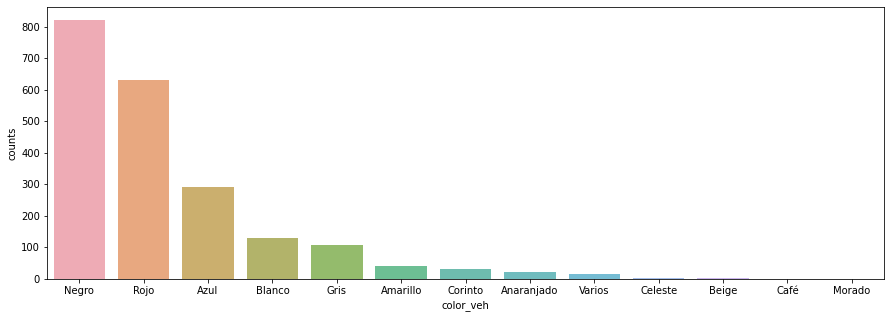

In [13]:
s = dataAcc_Total.groupby('color_veh').size().reset_index(name='counts').sort_values(ascending=False, by=['counts'])
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(s.color_veh, s.counts, alpha=0.8, ax=ax)

In [14]:
dataAcc_Total.groupby('color_veh').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False).head(3)

,color_veh,counts
10,Negro,821
11,Rojo,631
2,Azul,293


# PALETA DE COLORES ESCOGIDA

https://coolors.co/003049-d62828-f77f00-fcbf49-eae2b7

In [15]:
from IPython.display import Image
Image("./paleta.png")

FileNotFoundError: No such file or directory: './paleta.png'

FileNotFoundError: No such file or directory: './paleta.png'

<IPython.core.display.Image object>

Se eligio esta paleta de colores debido a que los colores fuertes como rojo y naranja para remarcar datos importantes de los accidentes.

In [ ]:
acc_by_year = dataAcc_Total.groupby('año_ocu')